In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict,StratifiedShuffleSplit,cross_validate,cross_validate,ShuffleSplit
from sklearn.decomposition import PCA

In [142]:
# df_score = pd.read_csv("../Feature_selection/ft_important.csv")
# df_score.drop(columns=["Unnamed: 0"], inplace=True)
# df_score

In [143]:
# fti_index = df_score['index'].values
# fti_index = fti_index.astype(dtype=str)
# fti_index = np.insert(fti_index,0,'0')


In [144]:
# ranks = []
# for i in range(len(list_feature)):
#     arr = []
#     for j in range(i+1):
#         arr.append(list_feature[j])
#     ranks.append(arr)
# ranks

In [145]:
df_train = pd.read_csv("../data_train_frequency.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,Heart_rate_mean_lead_1,Rcount_lead_1,Tcount_lead_1,Qcount_lead_1,Scount_lead_1,Pcount_lead_1,RR_interval_mean_lead_1,RR_interval_median_lead_1,RR_interval_std_lead_1,RR_interval_var_lead_1,...,Pcount_lead_12,RR_interval_mean_lead_12,RR_interval_median_lead_12,RR_interval_std_lead_12,RR_interval_var_lead_12,RR_interval_skew_lead_12,RR_interval_kurtosis_lead_12,P_duration_mean_lead_12,P_duration_var_lead_12,Rhythm
0,135.264989,21.0,20.0,20.0,20.0,21.0,443.500000,446.0,4.376071,19.150000,...,17.0,443.600000,444.0,2.870540,8.240000,-0.052762,-0.389198,99.375000,1090.359375,3
1,57.854064,9.0,9.0,8.0,8.0,9.0,1037.000000,1037.0,5.567764,31.000000,...,9.0,1037.250000,1037.0,5.562149,30.937500,0.145464,-1.520196,88.666667,1116.444444,1
2,120.929768,20.0,11.0,19.0,19.0,19.0,496.526316,494.0,17.421609,303.512465,...,20.0,496.421053,494.0,17.871812,319.401662,0.701888,2.736641,104.750000,1826.937500,3
3,101.284713,16.0,16.0,15.0,15.0,16.0,592.400000,594.0,4.144072,17.173333,...,16.0,592.400000,592.0,3.946306,15.573333,-1.164258,1.100300,89.750000,75.437500,3
4,59.040992,9.0,9.0,8.0,8.0,9.0,1016.000000,1022.0,14.142136,200.000000,...,9.0,1015.750000,1022.0,14.471956,209.437500,-0.827427,-0.328211,99.555556,979.358025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,57.862657,10.0,9.0,9.0,9.0,9.0,1040.222222,1028.0,49.999506,2499.950617,...,9.0,1040.666667,1026.0,49.826365,2482.666667,0.577664,-1.094707,104.666667,971.555556,1
8512,56.882378,9.0,9.0,8.0,8.0,9.0,1055.000000,1055.0,13.674794,187.000000,...,9.0,1055.000000,1054.0,12.806248,164.000000,-0.047138,-1.190400,119.777778,171.061728,1
8513,131.287714,21.0,20.0,16.0,20.0,21.0,457.100000,458.0,2.998333,8.990000,...,21.0,457.100000,458.0,2.998333,8.990000,-0.541569,-0.031683,58.476190,614.058957,3
8514,92.506368,14.0,12.0,13.0,13.0,14.0,648.461538,650.0,5.772819,33.325444,...,14.0,648.461538,650.0,4.516898,20.402367,-0.608104,-0.345317,64.428571,818.387755,2


In [146]:
# df_train = df_train[fti_index]

In [147]:
df_train

,Heart_rate_mean_lead_1,Rcount_lead_1,Tcount_lead_1,Qcount_lead_1,Scount_lead_1,Pcount_lead_1,RR_interval_mean_lead_1,RR_interval_median_lead_1,RR_interval_std_lead_1,RR_interval_var_lead_1,...,Pcount_lead_12,RR_interval_mean_lead_12,RR_interval_median_lead_12,RR_interval_std_lead_12,RR_interval_var_lead_12,RR_interval_skew_lead_12,RR_interval_kurtosis_lead_12,P_duration_mean_lead_12,P_duration_var_lead_12,Rhythm
0,135.264989,21.0,20.0,20.0,20.0,21.0,443.500000,446.0,4.376071,19.150000,...,17.0,443.600000,444.0,2.870540,8.240000,-0.052762,-0.389198,99.375000,1090.359375,3
1,57.854064,9.0,9.0,8.0,8.0,9.0,1037.000000,1037.0,5.567764,31.000000,...,9.0,1037.250000,1037.0,5.562149,30.937500,0.145464,-1.520196,88.666667,1116.444444,1
2,120.929768,20.0,11.0,19.0,19.0,19.0,496.526316,494.0,17.421609,303.512465,...,20.0,496.421053,494.0,17.871812,319.401662,0.701888,2.736641,104.750000,1826.937500,3
3,101.284713,16.0,16.0,15.0,15.0,16.0,592.400000,594.0,4.144072,17.173333,...,16.0,592.400000,592.0,3.946306,15.573333,-1.164258,1.100300,89.750000,75.437500,3
4,59.040992,9.0,9.0,8.0,8.0,9.0,1016.000000,1022.0,14.142136,200.000000,...,9.0,1015.750000,1022.0,14.471956,209.437500,-0.827427,-0.328211,99.555556,979.358025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,57.862657,10.0,9.0,9.0,9.0,9.0,1040.222222,1028.0,49.999506,2499.950617,...,9.0,1040.666667,1026.0,49.826365,2482.666667,0.577664,-1.094707,104.666667,971.555556,1
8512,56.882378,9.0,9.0,8.0,8.0,9.0,1055.000000,1055.0,13.674794,187.000000,...,9.0,1055.000000,1054.0,12.806248,164.000000,-0.047138,-1.190400,119.777778,171.061728,1
8513,131.287714,21.0,20.0,16.0,20.0,21.0,457.100000,458.0,2.998333,8.990000,...,21.0,457.100000,458.0,2.998333,8.990000,-0.541569,-0.031683,58.476190,614.058957,3
8514,92.506368,14.0,12.0,13.0,13.0,14.0,648.461538,650.0,5.772819,33.325444,...,14.0,648.461538,650.0,4.516898,20.402367,-0.608104,-0.345317,64.428571,818.387755,2


In [148]:
x_train = df_train.iloc[:,:-1].values    
y_train = df_train.iloc[:,-1].values

In [149]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
# x_train = apply_pca(x_train, len(x_train[0]))

In [150]:
df_test = pd.read_csv("../data_test_frequency.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,Heart_rate_mean_lead_1,Rcount_lead_1,Tcount_lead_1,Qcount_lead_1,Scount_lead_1,Pcount_lead_1,RR_interval_mean_lead_1,RR_interval_median_lead_1,RR_interval_std_lead_1,RR_interval_var_lead_1,...,Pcount_lead_12,RR_interval_mean_lead_12,RR_interval_median_lead_12,RR_interval_std_lead_12,RR_interval_var_lead_12,RR_interval_skew_lead_12,RR_interval_kurtosis_lead_12,P_duration_mean_lead_12,P_duration_var_lead_12,Rhythm
0,91.357304,15.0,15.0,8.0,14.0,15.0,658.428571,675.0,84.597124,7156.673469,...,15.00000,658.571429,661.00000,70.177036,4924.816327,0.123471,-1.174103,67.733333,1013.262222,0
1,104.925378,17.0,17.0,16.0,16.0,17.0,572.000000,572.0,8.000000,64.000000,...,17.00000,572.000000,572.00000,7.874008,62.000000,0.000000,-0.950052,105.294118,238.089965,3
2,139.708509,23.0,1.0,5.0,22.0,14.0,429.545455,430.0,3.299136,10.884298,...,11.81303,812.089826,811.74901,53.489742,7991.698656,-0.004035,-0.474963,97.063009,956.272706,3
3,60.076526,10.0,9.0,9.0,9.0,10.0,984.222222,1002.0,97.335363,9474.172840,...,9.00000,1016.250000,1008.00000,33.517719,1123.437500,1.347824,0.880506,111.111111,306.765432,1
4,93.221682,15.0,15.0,14.0,14.0,15.0,643.428571,643.0,6.986868,48.816327,...,14.00000,643.571429,644.00000,7.296910,53.244898,0.039621,-1.150996,125.692308,5324.828402,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,109.358528,18.0,16.0,16.0,17.0,18.0,548.823529,548.0,22.523805,507.321799,...,5.00000,548.705882,548.00000,23.110387,534.089965,1.903770,5.901377,100.400000,909.440000,3
2126,107.127991,18.0,13.0,17.0,17.0,15.0,559.882353,560.0,4.873486,23.750865,...,17.00000,560.000000,560.00000,4.946776,24.470588,0.139951,-0.724112,122.533333,663.715556,3
2127,59.345427,10.0,10.0,9.0,9.0,10.0,1008.000000,1004.0,162.953299,26553.777778,...,10.00000,1007.777778,1002.00000,162.350634,26357.728395,0.976081,-0.044749,95.000000,1041.000000,0
2128,63.253626,10.0,10.0,9.0,9.0,10.0,954.222222,970.0,171.405807,29379.950617,...,9.00000,954.444444,960.00000,174.327349,30390.024691,0.429351,-1.016011,101.750000,4853.437500,0


In [151]:
# df_test = df_test[fti_index]

In [152]:
df_test

,Heart_rate_mean_lead_1,Rcount_lead_1,Tcount_lead_1,Qcount_lead_1,Scount_lead_1,Pcount_lead_1,RR_interval_mean_lead_1,RR_interval_median_lead_1,RR_interval_std_lead_1,RR_interval_var_lead_1,...,Pcount_lead_12,RR_interval_mean_lead_12,RR_interval_median_lead_12,RR_interval_std_lead_12,RR_interval_var_lead_12,RR_interval_skew_lead_12,RR_interval_kurtosis_lead_12,P_duration_mean_lead_12,P_duration_var_lead_12,Rhythm
0,91.357304,15.0,15.0,8.0,14.0,15.0,658.428571,675.0,84.597124,7156.673469,...,15.00000,658.571429,661.00000,70.177036,4924.816327,0.123471,-1.174103,67.733333,1013.262222,0
1,104.925378,17.0,17.0,16.0,16.0,17.0,572.000000,572.0,8.000000,64.000000,...,17.00000,572.000000,572.00000,7.874008,62.000000,0.000000,-0.950052,105.294118,238.089965,3
2,139.708509,23.0,1.0,5.0,22.0,14.0,429.545455,430.0,3.299136,10.884298,...,11.81303,812.089826,811.74901,53.489742,7991.698656,-0.004035,-0.474963,97.063009,956.272706,3
3,60.076526,10.0,9.0,9.0,9.0,10.0,984.222222,1002.0,97.335363,9474.172840,...,9.00000,1016.250000,1008.00000,33.517719,1123.437500,1.347824,0.880506,111.111111,306.765432,1
4,93.221682,15.0,15.0,14.0,14.0,15.0,643.428571,643.0,6.986868,48.816327,...,14.00000,643.571429,644.00000,7.296910,53.244898,0.039621,-1.150996,125.692308,5324.828402,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,109.358528,18.0,16.0,16.0,17.0,18.0,548.823529,548.0,22.523805,507.321799,...,5.00000,548.705882,548.00000,23.110387,534.089965,1.903770,5.901377,100.400000,909.440000,3
2126,107.127991,18.0,13.0,17.0,17.0,15.0,559.882353,560.0,4.873486,23.750865,...,17.00000,560.000000,560.00000,4.946776,24.470588,0.139951,-0.724112,122.533333,663.715556,3
2127,59.345427,10.0,10.0,9.0,9.0,10.0,1008.000000,1004.0,162.953299,26553.777778,...,10.00000,1007.777778,1002.00000,162.350634,26357.728395,0.976081,-0.044749,95.000000,1041.000000,0
2128,63.253626,10.0,10.0,9.0,9.0,10.0,954.222222,970.0,171.405807,29379.950617,...,9.00000,954.444444,960.00000,174.327349,30390.024691,0.429351,-1.016011,101.750000,4853.437500,0


In [153]:
x_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

In [154]:
x_test = scale.transform(x_test)
# x_test = apply_pca(x_test, len(x_test[0]))

In [155]:
# # Create based model
# level0 = list()
# level0.append(('RF', RandomForestClassifier(criterion='log_loss', max_depth=5, max_features='sqrt', n_estimators=50)))
# level0.append(('XGB', XGBClassifier(gamma=0, learning_rate = 0.1, max_depth= 3, min_child_weight= 1, n_estimators= 1000)))


# level1 = list()
# level1.append(('LR', LogisticRegression(C= 10, max_iter= 200, penalty= 'l2', solver= 'saga')))
# level1.append(('SVM', SVC(C= 10, gamma= 'scale', kernel= 'rbf', probability= True)))
# level1.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'sqrt',splitter= 'best')))
# level1.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))

# level2 = list()
# level2.append(('RF', RandomForestClassifier(criterion='log_loss', max_depth=5, max_features='sqrt', n_estimators=50)))
# level2.append(('XGB', XGBClassifier(gamma=0, learning_rate = 0.1, max_depth= 3, min_child_weight= 1, n_estimators= 1000)))
# level2.append(('LR', LogisticRegression(C= 10, max_iter= 200, penalty= 'l2', solver= 'saga')))
# level2.append(('SVM', SVC(C= 10, gamma= 'scale', kernel= 'rbf', probability= True)))
# level2.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'sqrt',splitter= 'best')))
# level2.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))

In [156]:
# # Create based model
# level0 = list()
# level0.append(('RF', RandomForestClassifier(criterion= 'entropy', max_depth= 18, max_features= 'sqrt', n_estimators= 40)))
# level0.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.06,max_depth= 5,min_child_weight= 1,n_estimators= 950)))


# level1 = list()
# level1.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))
# level1.append(('SVM', SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)))
# level1.append(('RF', RandomForestClassifier(criterion= 'entropy', max_depth= 18, max_features= 'sqrt', n_estimators= 40)))
# level1.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.06,max_depth= 5,min_child_weight= 1,n_estimators= 950)))

# level2 = list()
# level2.append(('RF', RandomForestClassifier(criterion= 'entropy', max_depth= 18, max_features= 'sqrt', n_estimators= 40)))
# level2.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.06,max_depth= 5,min_child_weight= 1,n_estimators= 950)))
# level2.append(('LR', LogisticRegression(C= 0.15, max_iter= 30, multi_class= 'auto', n_jobs= -1, penalty= 'l2', solver= 'sag', tol= 0.001)))
# level2.append(('SVM', SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)))
# level2.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 6,max_features= 'log2',splitter= 'best')))
# level2.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))

In [157]:
# Create based model
level0 = list()
level0.append(('RF', RandomForestClassifier(criterion= 'log_loss', max_depth= 15, max_features= 'sqrt', n_estimators= 40)))
level0.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.6,max_depth= 5,min_child_weight= 1,n_estimators= 950)))
level0.append(('SVM', SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)))
level0.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))

level1 = list()
level1.append(('SVM', SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)))
level1.append(('RF', RandomForestClassifier(criterion= 'entropy', max_depth= 18, max_features= 'sqrt', n_estimators= 40)))
level1.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.6,max_depth= 5,min_child_weight= 1,n_estimators= 950)))
level1.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))
level1.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 6,max_features= 'log2',splitter= 'best')))

level2 = list()
level2.append(('RF', RandomForestClassifier(criterion= 'log_loss', max_depth= 15, max_features= 'sqrt', n_estimators= 40)))
level2.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.6,max_depth= 5,min_child_weight= 1,n_estimators= 950)))
level2.append(('SVM', SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)))
level2.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 6,max_features= 'log2',splitter= 'best')))
level2.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))
level2.append(('AD', AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate=0.1, n_estimators=61)))

In [158]:
from sklearn.model_selection import KFold,StratifiedKFold,StratifiedShuffleSplit,StratifiedGroupKFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=10,random_state=None)

train_lv1 = np.empty((x_train.shape[0], 0))
test_lv1 = np.empty((x_test.shape[0], 0))
ac_lv1 = []
for name, model in level0:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        print(f"Fold {i}")
        print(f"train: {len(train_index)}")
        print(f"test: {len(test_index)}")
        # Train model in 4/5
        model.fit(x_train[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(x_train[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(x_train, y_train)
    test_model = model.predict(x_test)
    # Add column to news data
    train_lv1 = np.column_stack((train_lv1, np.array(train_model).reshape(-1, 1)))
    test_lv1 = np.column_stack((test_lv1, np.array(test_model).reshape(-1, 1)))
    ac_lv1.append(accuracy_score(train_model, y_train))
    print("-------Done-------")


Model: RF
----------------
Fold 0
train: 7664
test: 852


Fold 1
train: 7664
test: 852
Fold 2
train: 7664
test: 852
Fold 3
train: 7664
test: 852
Fold 4
train: 7664
test: 852
Fold 5
train: 7664
test: 852
Fold 6
train: 7665
test: 851
Fold 7
train: 7665
test: 851
Fold 8
train: 7665
test: 851
Fold 9
train: 7665
test: 851
-------Done-------
Model: XGB
----------------
Fold 0
train: 7664
test: 852
Fold 1
train: 7664
test: 852
Fold 2
train: 7664
test: 852
Fold 3
train: 7664
test: 852
Fold 4
train: 7664
test: 852
Fold 5
train: 7664
test: 852
Fold 6
train: 7665
test: 851
Fold 7
train: 7665
test: 851
Fold 8
train: 7665
test: 851
Fold 9
train: 7665
test: 851
-------Done-------
Model: SVM
----------------
Fold 0
train: 7664
test: 852
Fold 1
train: 7664
test: 852
Fold 2
train: 7664
test: 852
Fold 3
train: 7664
test: 852
Fold 4
train: 7664
test: 852
Fold 5
train: 7664
test: 852
Fold 6
train: 7665
test: 851
Fold 7
train: 7665
test: 851
Fold 8
train: 7665
test: 851
Fold 9
train: 7665
test: 851
-------Done-------


In [159]:
ac_lv1

[0.9479802724283701, 0.9590183184593706, 0.9469234382339127]

In [160]:
# train_news_final = pd.read_csv("../train_news_final.csv")
# train_news_final.drop(columns=['Unnamed: 0'],inplace=True)
# test_news_final = pd.read_csv("../test_news_final.csv")
# test_news_final.drop(columns=['Unnamed: 0'],inplace=True)
# train_news_final = train_news_final.to_numpy()
# test_news_final = test_news_final.to_numpy()
# pd.DataFrame(train_news_final).to_csv("../train_news_final_split10.csv")

In [161]:
print(train_lv1)

[[3. 3. 3.]
 [1. 1. 1.]
 [3. 3. 3.]
 ...
 [3. 3. 3.]
 [2. 2. 2.]
 [0. 0. 0.]]


In [162]:
warnings.filterwarnings('ignore')

train_lv2 = np.empty((train_lv1.shape[0], 0))
test_lv2 = np.empty((test_lv1.shape[0], 0))
ac_lv2 = []
for name, model in level1:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(train_lv1, y_train)):
        print(f"Fold {i}")
        # Train model in 4/5
        model.fit(train_lv1[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(train_lv1[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(train_lv1, y_train)
    test_model = model.predict(test_lv1)
    # Add column to news data
    train_lv2 = np.column_stack((train_lv2, np.array(train_model).reshape(-1, 1)))
    test_lv2 = np.column_stack((test_lv2, np.array(test_model).reshape(-1, 1)))
    ac_lv2.append(accuracy_score(train_model, y_train))
    print("-------Done-------")

Model: SVM
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------
Model: RF
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------
Model: XGB
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------
Model: KNN
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------


In [163]:
print(ac_lv2)

[0.9571395021136684, 0.9583137623297323, 0.9572569281352747, 0.9554955378111789]


In [164]:
print(train_lv2)

[[3. 3. 3. 3.]
 [1. 1. 1. 1.]
 [3. 3. 3. 3.]
 ...
 [3. 3. 3. 3.]
 [2. 2. 2. 2.]
 [0. 0. 0. 0.]]


In [165]:
warnings.filterwarnings('ignore')

train_lv3 = np.empty((train_lv2.shape[0], 0))
test_lv3 = np.empty((test_lv2.shape[0], 0))
ac_lv3 = []
for name, model in level2:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(train_lv2, y_train)):
        print(f"Fold {i}")
        # Train model in 4/5
        model.fit(train_lv2[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(train_lv2[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(train_lv2, y_train)
    test_model = model.predict(test_lv2)
    # Add column to news data
    train_lv3 = np.column_stack((train_lv3, np.array(train_model).reshape(-1, 1)))
    test_lv3 = np.column_stack((test_lv3, np.array(test_model).reshape(-1, 1)))
    ac_lv3.append(accuracy_score(train_model, y_train))
#     print("-------Done-------")

Model: RF
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: XGB
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: SVM
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: DT
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: KNN
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9


In [166]:
print(ac_lv3)

[0.9581963363081258, 0.9581963363081258, 0.9579614842649131, 0.9579614842649131, 0.9577266322217003]


In [167]:
# pd.DataFrame(train_news_final).to_csv("../train_news_final_split15.csv")
# pd.DataFrame(test_news_final).to_csv("../test_news_final_split15.csv")

In [183]:
# train_news_final = pd.read_csv("../train_news_final_split15.csv")
# test_news_final = pd.read_csv("../test_news_final_split15.csv")
# train_news_final.drop(columns=["Unnamed: 0"], inplace=True)
# test_news_final.drop(columns=["Unnamed: 0"], inplace=True)
train_news_final = train_lv3
test_news_final = test_lv3

In [184]:
# # KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = KNeighborsClassifier()
# params = {
#     'n_neighbors': [4,5,6],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1,2,3]
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [225]:
# LogisticRegression
# from sklearn.model_selection import GridSearchCV
# meta_model = LogisticRegression()
# params = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.05,0.1,0.5],
#     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#     'max_iter': [20,30,50,100]
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=3, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_
# {'C': 0.05, 'max_iter': 20, 'penalty': 'l1', 'solver': 'saga'}

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=0.05, max_iter=20, penalty=l1, solver=liblinear;, score=0.763 total time=   0.0s
[CV 2/3] END C=0.05, max_iter=20, penalty=l1, solver=liblinear;, score=0.755 total time=   0.0s
[CV 3/3] END C=0.05, max_iter=20, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END C=0.05, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END C=0.05, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END C=0.05, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END C=0.05, max_iter=20, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.

LogisticRegression(C=0.05, max_iter=20, penalty='l1', solver='saga')

In [226]:
print(train_news_final.shape)
print(test_news_final.shape)

(8516, 5)
(2130, 5)


In [227]:
pd.DataFrame(train_news_final)

,0,1,2,3,4
0,3.0,3.0,3.0,3.0,3.0
1,1.0,1.0,1.0,1.0,1.0
2,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0
4,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
8511,1.0,1.0,1.0,1.0,1.0
8512,1.0,1.0,1.0,1.0,1.0
8513,3.0,3.0,3.0,3.0,3.0
8514,2.0,2.0,2.0,2.0,2.0


In [228]:
# XGBClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = XGBClassifier()
# params = {
#     'n_estimators': [50,100,200],
#     'learning_rate': [0.01,0.05,0.1],
#     'max_depth': [1,10],
#     'min_child_weight':[1,10],
#     'gamma':[0.01,0.05],
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=4, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [229]:
# XGBClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = SVC()
# params = {
#     'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
#     'C': [0.005,0.01, 0.05],
#     'gamma': ['scale', 'auto'],
#     'probability': [True]
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=4, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [262]:
# RandomForest
from sklearn.model_selection import GridSearchCV
meta_model = AdaBoostClassifier()
params = {
    'n_estimators': [70,80,90],
    'learning_rate': [0.2, 0.3, 0.4],
    'algorithm': ['SAMME', 'SAMME.R'],
}
GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=3, verbose=5)
GS.fit(train_news_final, y_train)
GS.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=70;, score=0.962 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=70;, score=0.956 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=70;, score=0.956 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=80;, score=0.962 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=80;, score=0.956 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=80;, score=0.956 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=90;, score=0.962 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=90;, score=0.956 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=90;, score=0.956 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.3, n_estima

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.2, n_estimators=80)

In [263]:
# RandomForest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = RandomForestClassifier()
# params = {
#     'n_estimators': [10,50,100,500],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': [3,4,5],
#     'max_features':['sqrt', 'log2'],
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=3, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [264]:
best_model = GS.best_estimator_
y_pred = best_model.predict(test_news_final)

In [265]:
GS.best_score_

0.9581961145072952

In [266]:
GS.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 80}

In [267]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

In [274]:
len(y_pred)

2130

In [285]:
fs_index = []
for i, value in enumerate(np.array(y_test == y_pred) == False):
    if value == True:
        fs_index.append(i)
print(fs_index)

[21, 81, 139, 143, 162, 171, 190, 209, 285, 288, 302, 320, 353, 363, 383, 434, 466, 489, 505, 511, 519, 559, 568, 576, 577, 583, 641, 653, 669, 682, 689, 695, 699, 752, 770, 877, 881, 942, 965, 1044, 1045, 1119, 1139, 1154, 1209, 1255, 1261, 1274, 1350, 1352, 1360, 1362, 1369, 1385, 1400, 1430, 1445, 1594, 1605, 1608, 1629, 1642, 1647, 1672, 1727, 1732, 1743, 1768, 1802, 1816, 1832, 1849, 1916, 1969, 1983, 2022, 2088, 2118]


In [288]:
df_test.iloc[fs_index,:]

,Heart_rate_mean_lead_1,Rcount_lead_1,Tcount_lead_1,Qcount_lead_1,Scount_lead_1,Pcount_lead_1,RR_interval_mean_lead_1,RR_interval_median_lead_1,RR_interval_std_lead_1,RR_interval_var_lead_1,...,Pcount_lead_12,RR_interval_mean_lead_12,RR_interval_median_lead_12,RR_interval_std_lead_12,RR_interval_var_lead_12,RR_interval_skew_lead_12,RR_interval_kurtosis_lead_12,P_duration_mean_lead_12,P_duration_var_lead_12,Rhythm
21,162.257479,27.000000,14.000000,25.000000,26.000000,4.000000,369.923077,368.000000,5.504705,30.301775,...,4.00000,369.923077,368.00000,5.615385,31.532544,0.873463,-0.687430,40.000000,116.000000,0
81,148.261914,24.000000,5.000000,19.000000,23.000000,14.000000,404.695652,404.000000,1.920932,3.689981,...,4.00000,404.608696,404.00000,1.811536,3.281664,0.065698,-0.871658,56.500000,422.750000,0
139,80.840026,13.000000,13.000000,12.000000,12.000000,13.000000,742.666667,742.000000,18.354533,336.888889,...,13.00000,742.666667,742.00000,17.782638,316.222222,-0.405116,-0.566294,74.615385,320.852071,3
143,81.135811,12.000000,12.000000,11.000000,11.000000,12.000000,754.727273,658.000000,259.030743,67096.925620,...,10.00000,922.666667,964.00000,277.479128,76994.666667,0.180511,-1.669449,62.000000,301.600000,2
162,83.656345,13.000000,12.000000,12.000000,12.000000,12.000000,774.500000,598.000000,653.429478,426970.083333,...,13.00000,590.461538,600.00000,177.343047,31450.556213,0.975939,2.616653,162.500000,2412.750000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,74.817852,12.000000,12.000000,11.000000,11.000000,12.000000,805.636364,826.000000,97.323521,9471.867769,...,16.00000,580.125000,492.00000,152.907601,23380.734375,0.430997,-1.416195,93.625000,1679.609375,2
1983,83.683496,13.428047,11.333647,11.343247,12.383341,12.481882,811.614159,810.359247,54.561357,8286.103287,...,11.81303,812.089826,811.74901,53.489742,7991.698656,-0.004035,-0.474963,97.063009,956.272706,0
2022,63.671614,11.000000,10.000000,10.000000,10.000000,10.000000,942.400000,945.000000,6.621178,43.840000,...,10.00000,942.200000,945.00000,7.180529,51.560000,-0.483334,-1.320372,85.600000,668.640000,0
2088,92.550056,15.000000,14.000000,14.000000,14.000000,15.000000,650.714286,655.000000,40.887351,1671.775510,...,15.00000,650.857143,655.00000,40.839157,1667.836735,-0.050541,-0.651140,52.666667,272.888889,0


In [294]:
df_test.columns.values

array(['Heart_rate_mean_lead_1', 'Rcount_lead_1', 'Tcount_lead_1',
       'Qcount_lead_1', 'Scount_lead_1', 'Pcount_lead_1',
       'RR_interval_mean_lead_1', 'RR_interval_median_lead_1',
       'RR_interval_std_lead_1', 'RR_interval_var_lead_1',
       'RR_interval_skew_lead_1', 'RR_interval_kurtosis_lead_1',
       'PP_interval_median_lead_1', 'PP_interval_std_lead_1',
       'PP_interval_var_lead_1', 'PR_intervals_mean_lead_1',
       'PR_intervals_var_lead_1', 'PR_segment_mean_lead_1',
       'PR_segment_var_lead_1', 'P_duration_mean_lead_1',
       'P_duration_var_lead_1', 'Heart_rate_mean_lead_2', 'Rcount_lead_2',
       'Tcount_lead_2', 'Qcount_lead_2', 'Scount_lead_2', 'Pcount_lead_2',
       'RR_interval_mean_lead_2', 'RR_interval_median_lead_2',
       'RR_interval_std_lead_2', 'RR_interval_var_lead_2',
       'RR_interval_skew_lead_2', 'RR_interval_kurtosis_lead_2',
       'PP_interval_median_lead_2', 'PP_interval_std_lead_2',
       'PP_interval_var_lead_2', 'P_duration_mea

In [307]:
len(df_test.iloc[fs_index,:]["PP_interval_median_lead_6"].unique())

73

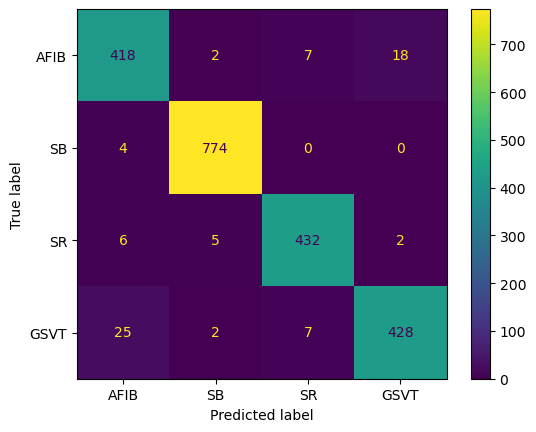

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.970892,0.939326,0.922737,0.930958,0.979228
1,SB,0.993897,0.994859,0.988506,0.991672,0.993343
2,SR,0.987324,0.970787,0.968610,0.969697,0.991691
3,GSVT,0.974648,0.926407,0.955357,0.940659,0.988010
4,macro avg,NaN,0.958246,0.958803,0.957844,NaN
5,micro avg,NaN,0.963380,0.963380,0.963380,NaN
6,weighted avg,NaN,0.963332,0.963419,0.963380,NaN


In [268]:
evaluation_test = evaluation_test(y_test,y_pred)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [269]:
# df_evaluation_test.to_csv("../Result/Stacking_multipleClass_lr_new_10fold_10cv.csv")